In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 資料分析

In [2]:
df=pd.read_csv('breast-cancer-data.csv')
df

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'


In [3]:
df.isna().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


# 資料前處理

In [5]:
# 找出最常見的值(為了做眾數填補)
most_common_value = df['breast-quad'].mode()[0]

# 填補缺失值
df['breast-quad'].fillna(most_common_value, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17160\831783384.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['breast-quad'].fillna(most_common_value, inplace=True)


In [6]:
# 找出最常見的值(為了做眾數填補)
most_common_value = df['node-caps'].mode()[0]

# 填補缺失值
df['node-caps'].fillna(most_common_value, inplace=True)
df.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_17160\1679879705.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['node-caps'].fillna(most_common_value, inplace=True)


age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiate      0
class          0
dtype: int64

In [7]:
# 分析特徵各項類別的數量
df['class'].value_counts()

class
no-recurrence-events'    201
recurrence-events'        85
Name: count, dtype: int64

In [8]:
# 分析特徵各項類別的數量
df['age'].value_counts()

age
50-59'    96
40-49'    90
60-69'    57
30-39'    36
70-79'     6
20-29'     1
Name: count, dtype: int64

In [9]:
df['menopause'].value_counts()

menopause
premeno'    150
ge40'       129
lt40'         7
Name: count, dtype: int64

In [10]:
df['inv-nodes'].value_counts()

inv-nodes
0-2'      213
3-5'       36
6-8'       17
9-11'      10
15-17'      6
12-14'      3
24-26'      1
Name: count, dtype: int64

In [11]:
df['tumer-size'].value_counts()

tumer-size
30-34'    60
25-29'    54
20-24'    50
15-19'    30
10-14'    28
40-44'    22
35-39'    19
0-4'       8
50-54'     8
5-9'       4
45-49'     3
Name: count, dtype: int64

# 圖表分析

In [12]:
# 特徵與標籤
X = df[['age','menopause','tumer-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiate']]
Y = df['class']

In [13]:
# 更改字體為中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

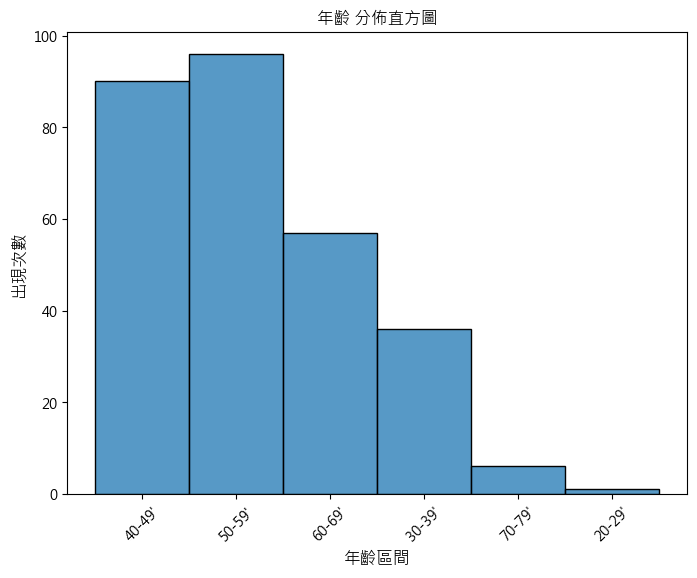

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 指定欄位的類別順序
order = ["20~29'", "30~39'", "40~49'", "50~59'", "60~69'", "70~79'"]

# 使用 Seaborn 繪製直方圖
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='age', bins=len(order), stat='count', discrete=True)
plt.title('年齡 分佈直方圖')
plt.xlabel('年齡區間', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

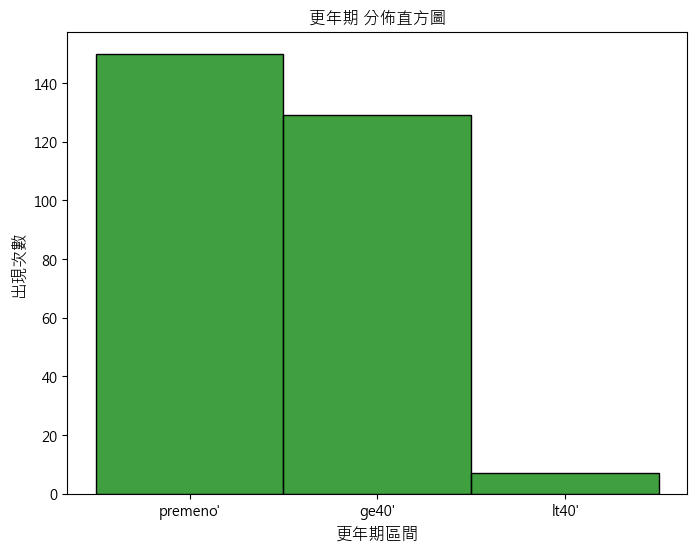

In [15]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='menopause', stat='count', color = 'green', discrete=True)
plt.title('更年期 分佈直方圖')
plt.xlabel('更年期區間', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

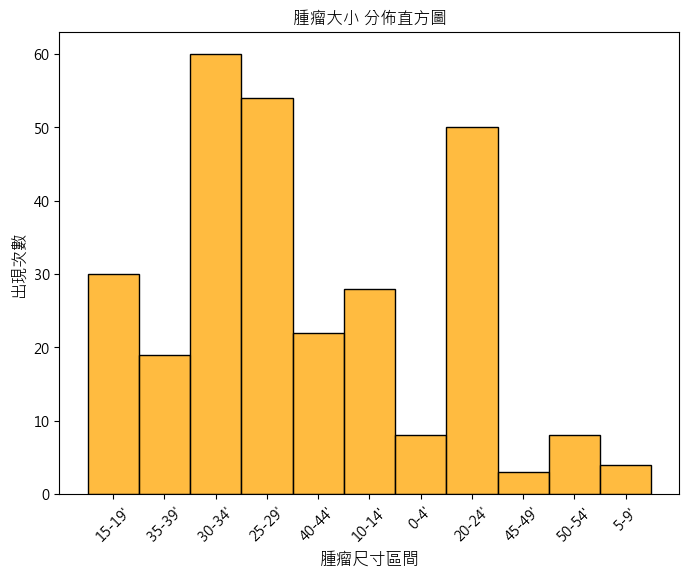

In [16]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='tumer-size', stat='count', color = 'orange', discrete=True)
plt.title('腫瘤大小 分佈直方圖')
plt.xlabel('腫瘤尺寸區間', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

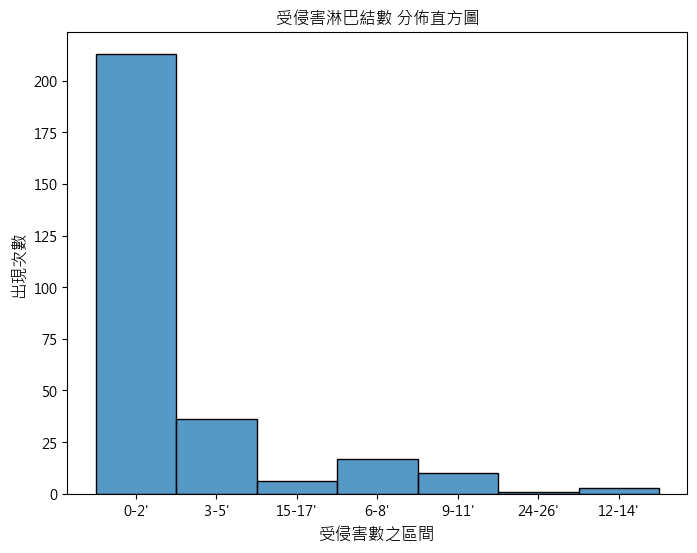

In [17]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='inv-nodes', stat='count', discrete=True)
plt.title('受侵害淋巴結數 分佈直方圖')
plt.xlabel('受侵害數之區間', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

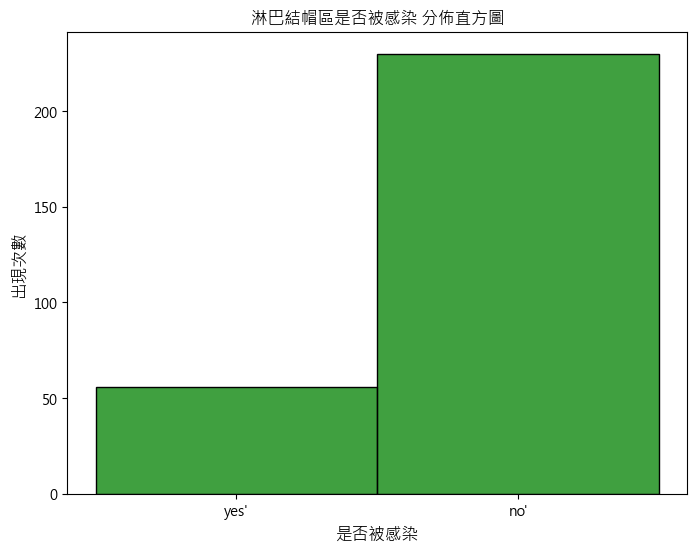

In [18]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='node-caps', stat='count', color = 'green', discrete=True)
plt.title('淋巴結帽區是否被感染 分佈直方圖')
plt.xlabel('是否被感染', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

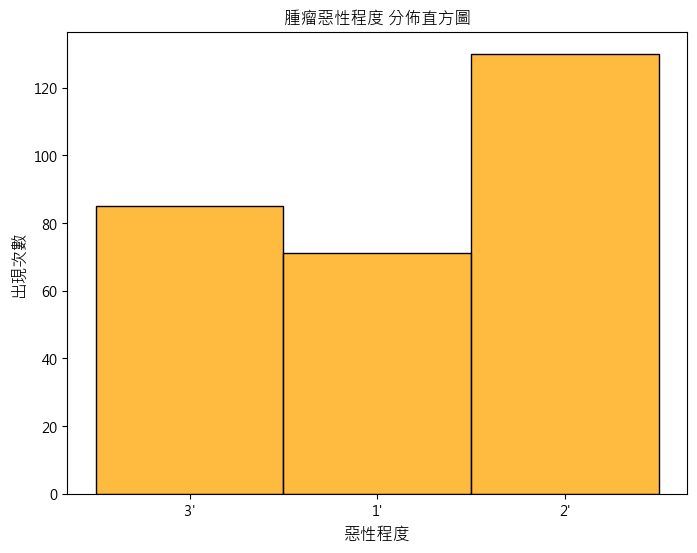

In [19]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='deg-malig', stat='count', color = 'orange', discrete=True)
plt.title('腫瘤惡性程度 分佈直方圖')
plt.xlabel('惡性程度', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

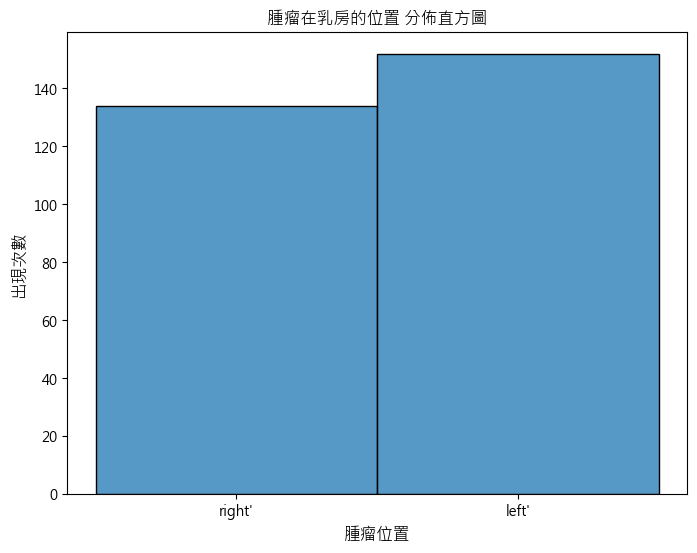

In [20]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='breast', stat='count', discrete=True)
plt.title('腫瘤在乳房的位置 分佈直方圖')
plt.xlabel('腫瘤位置', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

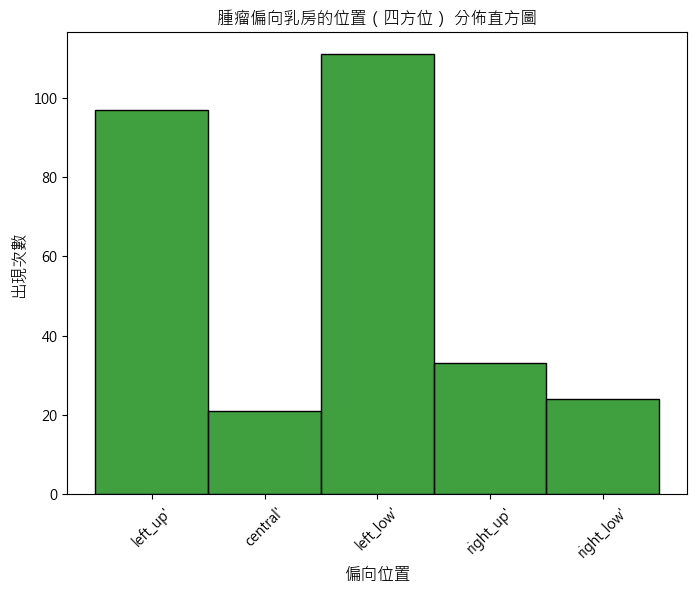

In [21]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='breast-quad', stat='count', color = 'green', discrete=True)
plt.title('腫瘤偏向乳房的位置（四方位） 分佈直方圖')
plt.xlabel('偏向位置', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

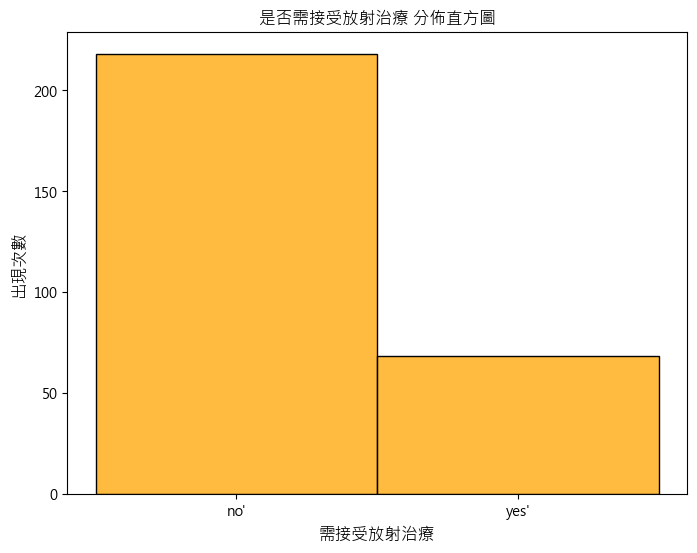

In [22]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='irradiate', stat='count', color = 'orange', discrete=True)
plt.title('是否需接受放射治療 分佈直方圖')
plt.xlabel('需接受放射治療', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

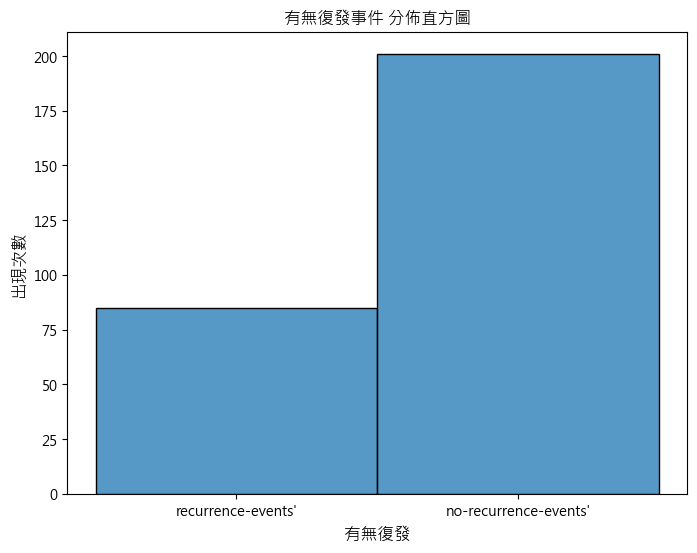

In [23]:
plt.figure(figsize=(8, 6))  # 設定圖的大小
sns.histplot(data=df, x='class', stat='count', discrete=True)
plt.title('有無復發事件 分佈直方圖')
plt.xlabel('有無復發', fontsize=12)  # 設定 x 軸標籤字體大小為 12
plt.ylabel('出現次數', fontsize=12)  # 設定 y 軸標籤字體大小為 12
#plt.xticks(rotation=45)  # 將 x 軸標籤旋轉以避免重疊
plt.show()

# 機器學習模型(內涵模型評估，Accuracy, Recall...)
## 最終選擇用邏輯斯迴歸模型(分類模型)，因為其準確率最高(0.79)
## 隨機森林模型，準確率0.72
## 支持向量機模型，準確率0.74
## 決策樹模型，準確率0.63

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 轉換標籤數據
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = label_encoder.fit_transform(df[column])

# 分割資料集為訓練集和測試集
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練邏輯迴歸模型
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 預測和評估
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 打印分類報告和準確率
print(classification_rep)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.79      0.95      0.86        40
           1       0.80      0.44      0.57        18

    accuracy                           0.79        58
   macro avg       0.80      0.70      0.72        58
weighted avg       0.79      0.79      0.77        58

Accuracy: 0.7931034482758621


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# 轉換標籤數據
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = label_encoder.fit_transform(df[column])

# 分割資料集為訓練集和測試集
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練隨機森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測和評估
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.57      0.44      0.50        18

    accuracy                           0.72        58
   macro avg       0.67      0.65      0.65        58
weighted avg       0.71      0.72      0.71        58

Accuracy: 0.7241379310344828


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 轉換標籤數據
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = label_encoder.fit_transform(df[column])

# 分割資料集為訓練集和測試集
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練支持向量機模型
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# 預測和評估
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 打印分類報告和準確率
print(classification_rep)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.77      0.90      0.83        40
           1       0.64      0.39      0.48        18

    accuracy                           0.74        58
   macro avg       0.70      0.64      0.66        58
weighted avg       0.73      0.74      0.72        58

Accuracy: 0.7413793103448276


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 轉換標籤數據
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = label_encoder.fit_transform(df[column])

# 分割資料集為訓練集和測試集
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練決策樹模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 預測和評估
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 打印分類報告和準確率
print(classification_rep)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.76      0.70      0.73        40
           1       0.43      0.50      0.46        18

    accuracy                           0.64        58
   macro avg       0.59      0.60      0.59        58
weighted avg       0.65      0.64      0.64        58

Accuracy: 0.6379310344827587


# 驗證方法(混淆矩陣)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        40
           1       0.80      0.44      0.57        18

    accuracy                           0.79        58
   macro avg       0.80      0.70      0.72        58
weighted avg       0.79      0.79      0.77        58

Accuracy: 0.7931034482758621


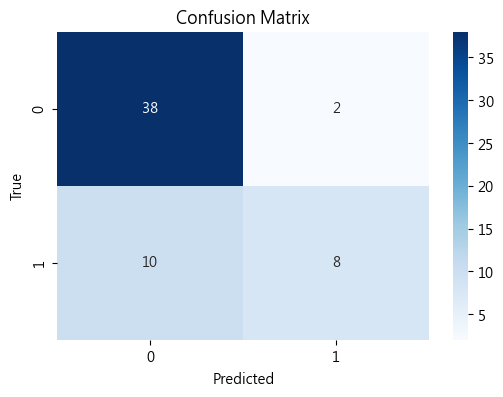

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# 建立和训练逻辑回归模型
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 打印分类报告和准确率
print(classification_rep)
print("Accuracy:", accuracy)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()